Edited by Vanessa Liang, April 20

##### **Data Science Process Model**
![alt text](https://chervine.net/wp-content/uploads/2017/02/image001-1.png)

##### **Business Understanding**
Diabetes is one of the deadliest and chronic diseases. About one in seven U.S. adults has diabetes now. By 2050, as many as one in three may become diabetic. Many complications occur if diabetes remains untreated and unidentified. Identifying patients who are at high-risk of becoming diabetic allows early medical interventions.

Data Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

##### **Data Understanding**

In [0]:
# visualizaiton & preparation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.offline as py
from sklearn.preprocessing import StandardScaler
# modeling
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
# evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_roc_curve, roc_curve, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/rawdata/master/diabetes.csv')

In [0]:
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# outliers exist: need to scale data before modeling
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


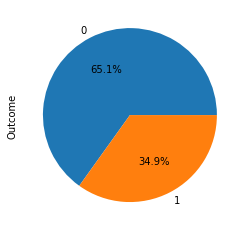

In [0]:
# most patients don't have diabetes: need oversampling in modeling
df["Outcome"].value_counts().plot(kind="pie", autopct='%1.1f%%')

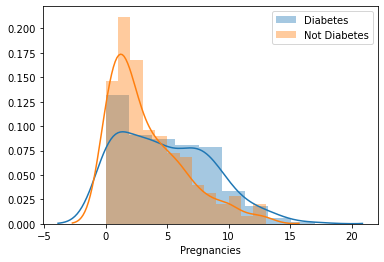

In [0]:
# patients with diabetes may have more pregnancy times
sns.distplot(df[df["Outcome"] == 1].Pregnancies, label="Diabetes")
sns.distplot(df[df["Outcome"] == 0].Pregnancies, label="Not Diabetes")
plt.legend()

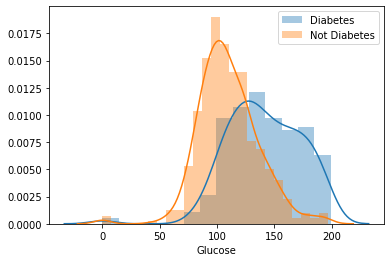

In [0]:
# patients with diabetes may ingest more glucose
sns.distplot(df[df["Outcome"] == 1].Glucose, label="Diabetes")
sns.distplot(df[df["Outcome"] == 0].Glucose, label="Not Diabetes")
plt.legend()

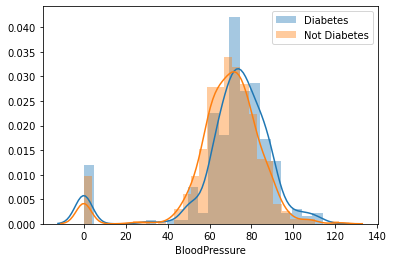

In [0]:
# patients with or without diabetes have similar distribution of blood pressure
sns.distplot(df[df["Outcome"] == 1].BloodPressure, label="Diabetes")
sns.distplot(df[df["Outcome"] == 0].BloodPressure, label="Not Diabetes")
plt.legend()

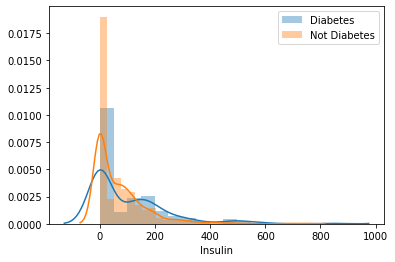

In [0]:
# patients with diabetes may have slightly insulin
sns.distplot(df[df["Outcome"] == 1].Insulin, label="Diabetes")
sns.distplot(df[df["Outcome"] == 0].Insulin, label="Not Diabetes")
plt.legend()

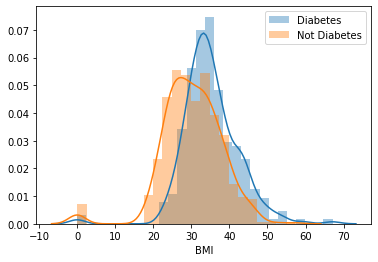

In [0]:
# patients with diabetes may have higher BMI
sns.distplot(df[df["Outcome"] == 1].BMI, label="Diabetes")
sns.distplot(df[df["Outcome"] == 0].BMI, label="Not Diabetes")
plt.legend()

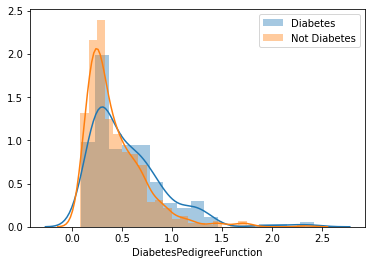

In [0]:
# patients with diabetes may have higher Diabetes Pedigree Function scores
sns.distplot(df[df["Outcome"] == 1].DiabetesPedigreeFunction, label="Diabetes")
sns.distplot(df[df["Outcome"] == 0].DiabetesPedigreeFunction, label="Not Diabetes")
plt.legend()

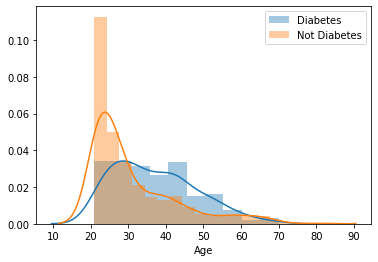

In [0]:
# patients with diabetes may have higher ages
sns.distplot(df[df["Outcome"] == 1].Age, label="Diabetes")
sns.distplot(df[df["Outcome"] == 0].Age, label="Not Diabetes")
plt.legend()

##### **Data Preparation**

In [0]:
# no need to fill null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
# preganicies and age have slight positive correlation
df.corr()[df.corr() >  0.5] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,NaN
Glucose,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodPressure,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Insulin,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.544341,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [0]:
X = df.drop(columns="Outcome")
y = df["Outcome"]

In [0]:
# scaling data
Standardisation = StandardScaler() 
X_scaled = pd.DataFrame(Standardisation.fit_transform(X), columns=X.columns)

##### **Modeling**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [0]:
# oversampling 
os = SMOTE(random_state=0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,  columns=['y'])

In [0]:
def model_report(model, X_train, X_test, y_train, y_test, algorithm):
    model.fit(X_train, y_train)
    predictions  = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    recallscore = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    roc = roc_curve(y_test, predictions)
    f1score = f1_score(y_test, predictions) 
    
    model_summary = pd.DataFrame({"model": [algorithm],
                       "accuracy_score": [accuracy],
                       "recall_score": [recallscore],
                       "precision": [precision],
                       "f1_score": [f1score],
                       "area_under_curve": [roc_auc],
                      })
    return model_summary, roc

In [0]:
# logistic regression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)
logreg_result = model_report(logreg, X_train, X_test, y_train, y_test, "Logistic Regression")
print("Accuracy: {}".format(logreg_result[0]["accuracy_score"][0]))

Accuracy: 0.7792207792207793


In [0]:
# logistic regression - grid search cv
param_grid = {
    'C': [0, 5, 10],
    'penalty': ["l1","l2"]
}

logreg_grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
logreg_grid.fit(X_train, y_train)
logreg_grid_result = model_report(logreg_grid, X_train, X_test, y_train, y_test, "Logistic Regression Grid Search CV")
print("Accuracy: {}".format(logreg_grid_result[0]["accuracy_score"][0]))

Accuracy: 0.7792207792207793


In [0]:
# svm
svm = SVC(gamma='auto', random_state=0)
svm.fit(X_train, y_train)
svm_result = model_report(svm, X_train, X_test, y_train, y_test, "SVM")
print("Accuracy: {}".format(svm_result[0]["accuracy_score"][0]))
svm.get_params

Accuracy: 0.7532467532467533


<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)>

In [0]:
# svm - grid search cv
param_grid = {
    'C': [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 10],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm_grid = GridSearchCV(estimator = svm, param_grid = param_grid, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_grid_result = model_report(svm_grid, X_train, X_test, y_train, y_test, "SVM Grid Search CV")
print("Accuracy: {}".format(svm_grid_result[0]["accuracy_score"][0]))

Accuracy: 0.7922077922077922


In [0]:
# random forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_result = model_report(rf, X_train, X_test, y_train, y_test, "Random Forest")
print("Accuracy: {}".format(rf_result[0]["accuracy_score"][0]))
rf.get_params

Accuracy: 0.7792207792207793


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)>

In [0]:
type(y_test)

pandas.core.series.Series

In [0]:
type(y_pred)

numpy.ndarray

In [0]:
# random forest - grid search cv
param_grid = {
    'max_depth': [5, 10, 20],
    'max_features': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [100, 200, 400]
}

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_grid_result = model_report(rf_grid, X_train, X_test, y_train, y_test, "Random Forest Grid Search CV")
print("Accuracy: {}".format(rf_grid_result[0]["accuracy_score"][0]))

Accuracy: 0.7922077922077922


##### **Evaluation**

In [0]:
evaluation = pd.concat([logreg_grid_result[0], svm_grid_result[0], rf_grid_result[0]], axis=0)
py.iplot(ff.create_table(np.round(evaluation,4)))

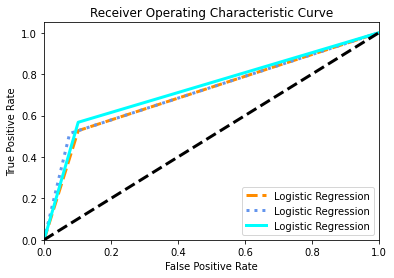

In [0]:
# roc curve
plt.figure()
plt.plot(logreg_grid_result[1][0], logreg_grid_result[1][1], label='Logistic Regression', color='darkorange', linestyle='dashed', linewidth=3)
plt.plot(svm_grid_result[1][0], svm_grid_result[1][1], label='Logistic Regression', color='cornflowerblue', linestyle='dotted', linewidth=3)
plt.plot(rf_grid_result[1][0], rf_grid_result[1][1], label='Logistic Regression', color='aqua', linestyle='solid', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In our case, we want to lower our false negatives rate - failure to identify diabetes patients. In other words, we want to increase our recall score, which will lower the precision. **The model with highest recall score, accuracy, and AUC is Random Forest**.

<br>

**Confusion Matrix**
<br>

Positive | Negative
--- | ---
**True Positive** - correctly identified patients with diabetes | **False Positive** - patients identified as having diabetes that were actually not
**False Negative** - patients incorrectly labeled as diabetes patients | **True Negative** - correctly identified patients without diabetes

<br>


<br>

**Recall Score**
<br>

$recall = \frac{\text{diabetes patients correctly identified}}{\text{diabetes patients correctly identified + diabetes patients incorrectly labeled as not having diabetes}}$

<br>

The recall score of the model is 0.5676, indicating that **the model can accurately identify 56.76% diabetes patients**. 

<br>

**Precision**
<br>

$precision = \frac{\text{diabetes patients correctly identified}}{\text{diabetes patients correctly identified + patients incorrectly labeled as diabetes patients}}$

<br>

The precision of the model is 0.7241, indicating **72% of the patients labeled as haivng diabetes by the model are actually having diabetes**.

<br>



**Area Under Curve**

From the ROC curve, we can see that the Random Forest model can identify the most positive data points - most diabetes patients. And the area under curve of the model is 0.7328.